In [1]:
#测试GPU可用性
import tensorflow as tf
print('GPU可用性:',tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU可用性: True


In [2]:
#数据读取
import numpy as np
import pandas as pd
#本次取50000条数据
chunks=50000
traindata = pd.read_csv('/mnt/workspace/Data/train_dataset/traindata.csv', nrows=chunks)    #读取训练集
trainmap = pd.read_csv('/mnt/workspace/Data/train_dataset/trainmap.csv')

In [3]:
#获取基因ID
CG_ID=traindata.iloc[:chunks,0]

In [4]:
#数据预处理函数
#预处理训练集
traindata = traindata.set_index('cpgsite')
traindata = traindata.T
traindata = traindata.reset_index()
traindata = traindata.rename(columns={'index':'sample_id'})
traindata.columns = ['sample_id'] + [i for i in range(chunks)]

In [5]:
traindata.to_pickle('/mnt/workspace/Disease_class/ClassDataPkl/ClassData.pkl')

In [6]:
#加载预处理后的数据
trainmap = pd.read_csv('/mnt/workspace/Data/train_dataset/trainmap.csv')
traindata = pd.read_pickle('/mnt/workspace/Disease_class/ClassDataPkl/ClassData.pkl')

In [7]:
#拼接CG编号
CG_ID_str=['sample_id']+list(CG_ID)
traindata.columns=CG_ID_str
traindata.head(10)

sample_id  cg00050873  cg00212031  cg00213748  cg00214611  cg00455876   
0  train10001         NaN         NaN         NaN         NaN         NaN  \
1  train10002         NaN         NaN         NaN         NaN         NaN   
2  train10003         NaN         NaN         NaN         NaN         NaN   
3  train10004         NaN         NaN         NaN         NaN         NaN   
4  train10005    1.136022   -4.489850         NaN   -3.993781    1.312567   
5  train10006    1.423834   -9.210440    1.035353   -3.837361    1.288795   
6  train10007         NaN         NaN         NaN         NaN         NaN   
7  train10008    1.475799   -3.993781         NaN   -4.051632    1.475799   
8  train10009         NaN         NaN         NaN         NaN         NaN   
9  train10010    1.515914   -4.051632         NaN   -4.585271    1.174443   

   cg01707559  cg02004872  cg02011394  cg02050847  ...  cg19321603   
0         NaN         NaN         NaN         NaN  ...    3.374769  \
1         NaN         NaN         NaN         NaN  ...    2.511081   
2         NaN         NaN         NaN         NaN  ...    2.324893   
3   -1.398461         NaN         NaN         NaN  ...    3.543689   
4   -2.901295   -4.585271    2.804368    2.985388  ...    2.401172   
5   -3.100385   -5.093549    2.767818    1.848299  ...    2.300497   
6         NaN         NaN         NaN         NaN  ...    2.648415   
7   -3.314031   -4.807960    2.785946    2.196336  ...    2.496772   
8         NaN         NaN         NaN         NaN  ...    2.218738   
9   -2.681278   -4.112908    3.406479    2.069693  ...    2.196336   

   cg19326232  cg19331040  cg19342109  cg19343088  cg19343809  cg19348622   
0   -5.492861   -3.201956   -2.414368   -2.698069   -2.942546   -4.402578  \
1   -4.247583   -3.659672   -2.218738   -2.823096   -2.804368   -3.175661   
2   -4.585271   -3.343970   -2.288480   -2.767818   -2.767818   -3.701353   
3   -4.940737   -3.314031   -2.585369   -3.007447   -4.247583   -2.861514   
4   -4.489850   -3.228904   -2.312634   -2.963760   -2.963760   -3.507691   
5   -4.247583   -3.284902   -2.131436   -3.100385   -3.149987   -3.744756   
6   -4.178048   -3.938986   -2.511081   -3.149987   -2.985388   -3.543689   
7   -5.093549   -3.314031   -2.585369   -3.007447   -2.749976   -3.837361   
8   -4.807960   -2.942546   -2.427712   -2.861514   -2.963760   -3.472874   
9   -3.659672   -3.175661   -2.100192   -2.804368   -2.749976   -3.701353   

   cg19349217  cg19349369  cg19350197  
0   -3.201956   -1.185564    2.253116  
1   -3.659672   -1.765757    2.511081  
2   -2.454856   -1.213659    1.765757  
3   -2.942546   -1.856830    2.207487  
4   -4.247583   -1.749816    2.264792  
5   -3.201956   -1.294708    2.185284  
6   -3.406479   -1.703036    2.767818  
7   -3.790034   -0.699002    2.468664  
8   -2.881228   -1.865415    2.570129  
9   -3.007447   -1.749816    2.163468  

[10 rows x 50001 columns]

In [8]:
#统计数据空缺值
traindata_null=traindata.isnull().sum().sum()    #统计前4万个特征缺失值
data_sum=traindata.shape[0]*traindata.shape[1]
traindata_null_rate=traindata_null/data_sum    #计算特征缺失率
print('训练数据缺失数据量为:{0},数据总量为:{1}'.format(traindata_null,data_sum))
print('训练数据缺失率为:{0}%'.format(round(traindata_null_rate*100,4)))

训练数据缺失数据量为:23688484,数据总量为:411658233
训练数据缺失率为:5.7544%


In [9]:
#缺失数据处理
traindata.fillna(0,inplace=True)    #训练集预处理

In [10]:
# 拼接数据集
traindata = traindata.merge(trainmap[['sample_id', 'age', 'gender', 'sample_type', 'disease']],on='sample_id',how='left')

In [11]:
#统计数据中患病数据和患病数据汇总
sample_type_sum=traindata['sample_type'].value_counts()    #统计患病数据总量
print('-----------------患病数据总量----------------')
print(sample_type_sum)
disease_sum=traindata['disease'].value_counts()    #汇总患病数据
print('-----------------患病数据汇总----------------')
print(disease_sum)

-----------------患病数据总量----------------
sample_type
control           6266
disease tissue    1967
Name: count, dtype: int64
-----------------患病数据汇总----------------
disease
control                 6266
Alzheimer's disease      737
schizophrenia            381
Parkinson's disease      266
rheumatoid arthritis     159
stroke                   147
Huntington's disease     135
Graves' disease           58
type 2 diabetes           46
Sjogren's syndrome        38
Name: count, dtype: int64


In [30]:
#数据类型转化
disease_mapping = {
    'control': 0,
    "Alzheimer's disease": 1,
    "Graves' disease": 2,
    "Huntington's disease": 3,
    "Parkinson's disease": 4,
    'rheumatoid arthritis': 5,
    'schizophrenia': 6,
    "Sjogren's syndrome": 7,
    'stroke': 8,
    'type 2 diabetes': 9
}    #构建数据对应关系
sample_type_mapping = {'control': 0, 'disease tissue': 1}
gender_mapping = {'F': 0, 'M': 1}
#训练集转化
traindata['disease_encode'] = traindata['disease'].map(disease_mapping)
traindata['sample_type_encode'] = traindata['sample_type'].map(sample_type_mapping)
traindata['gender_encode'] = traindata['gender'].map(gender_mapping)

In [44]:
traindata.head(10)

sample_id  cg00050873  cg00212031  cg00213748  cg00214611  cg00455876   
0  train10001    0.000000    0.000000    0.000000    0.000000    0.000000  \
1  train10002    0.000000    0.000000    0.000000    0.000000    0.000000   
2  train10003    0.000000    0.000000    0.000000    0.000000    0.000000   
3  train10004    0.000000    0.000000    0.000000    0.000000    0.000000   
4  train10005    1.136022   -4.489850    0.000000   -3.993781    1.312567   
5  train10006    1.423834   -9.210440    1.035353   -3.837361    1.288795   
6  train10007    0.000000    0.000000    0.000000    0.000000    0.000000   
7  train10008    1.475799   -3.993781    0.000000   -4.051632    1.475799   
8  train10009    0.000000    0.000000    0.000000    0.000000    0.000000   
9  train10010    1.515914   -4.051632    0.000000   -4.585271    1.174443   

   cg01707559  cg02004872  cg02011394  cg02050847  ...  cg19349217   
0    0.000000    0.000000    0.000000    0.000000  ...   -3.201956  \
1    0.000000    0.000000    0.000000    0.000000  ...   -3.659672   
2    0.000000    0.000000    0.000000    0.000000  ...   -2.454856   
3   -1.398461    0.000000    0.000000    0.000000  ...   -2.942546   
4   -2.901295   -4.585271    2.804368    2.985388  ...   -4.247583   
5   -3.100385   -5.093549    2.767818    1.848299  ...   -3.201956   
6    0.000000    0.000000    0.000000    0.000000  ...   -3.406479   
7   -3.314031   -4.807960    2.785946    2.196336  ...   -3.790034   
8    0.000000    0.000000    0.000000    0.000000  ...   -2.881228   
9   -2.681278   -4.112908    3.406479    2.069693  ...   -3.007447   

   cg19349369  cg19350197   age  gender     sample_type              disease   
0   -1.185564    2.253116  88.0       F  disease tissue  Alzheimer's disease  \
1   -1.765757    2.511081  92.0       F  disease tissue  Alzheimer's disease   
2   -1.213659    1.765757  93.0       F  disease tissue  Alzheimer's disease   
3   -1.856830    2.207487  96.0       F  disease tissue  Alzheimer's disease   
4   -1.749816    2.264792  91.0       M  disease tissue  Alzheimer's disease   
5   -1.294708    2.185284  80.0       M  disease tissue  Alzheimer's disease   
6   -1.703036    2.767818  79.0       F  disease tissue  Alzheimer's disease   
7   -0.699002    2.468664  77.0       M  disease tissue  Alzheimer's disease   
8   -1.865415    2.570129  85.0       F  disease tissue  Alzheimer's disease   
9   -1.749816    2.163468  80.0       M  disease tissue  Alzheimer's disease   

   disease_encode  sample_type_encode  gender_encode  
0               1                   1            0.0  
1               1                   1            0.0  
2               1                   1            0.0  
3               1                   1            0.0  
4               1                   1            1.0  
5               1                   1            1.0  
6               1                   1            0.0  
7               1                   1            1.0  
8               1                   1            0.0  
9               1                   1            1.0  

[10 rows x 50008 columns]

In [41]:
traindata['sample_type_encode'].value_counts()

sample_type_encode
0    6266
1    1967
Name: count, dtype: int64

In [57]:
#数据集划分
DataClass=traindata.loc[traindata['sample_type_encode']==1,:]    #去除正常数据
DataClass_Nomal=Data_Class.iloc[:,:]    #输入特征
Disease=DataClass.loc[:,'disease_encode']    #输入标签

特征选择

In [62]:
#低方差滤过策略
from sklearn.feature_selection import VarianceThreshold
Variance_Threshold=VarianceThreshold(threshold=0.5)
Variance_Threshold.fit(DataClass_Nomal)
print('剩余特征个数:',len(Variance_Threshold.get_support(True)))

剩余特征个数: 21526


In [63]:
from pandas import DataFrame
DataClass_Nomal=Variance_Threshold.transform(DataClass_Nomal)    #数据集转化
DataClass_Nomal=DataFrame(DataClass_Nomal)
DataClass_Nomal.columns=Variance_Threshold.get_feature_names_out()

In [64]:
#高相关过滤法，基于F分布
from sklearn.feature_selection import SelectKBest,f_classif
KBest=SelectKBest(score_func=f_classif,k=10000)    #获取高相关的前100000个特征
KBest.fit(DataClass_Nomal,Disease)
from pandas import DataFrame
Score_DF=DataFrame()
Score_DF['feature']=DataFrame(DataClass_Nomal).columns    #特征命
Score_DF['Score']=KBest.scores_    #相关系数
Score_DF['P-value']=KBest.pvalues_    #P值
Score_DF=Score_DF.sort_values('Score',ascending=False)

In [ ]:
#查看特征相关系数、P值
Score_DF.head(50)

In [66]:
#数据拼接
DataClass_Nomal=KBest.transform(DataClass_Nomal)
DataClass_Nomal=DataFrame(DataClass_Nomal)
DataClass_Nomal.columns=KBest.get_feature_names_out()

In [ ]:
#数据样本正态性检验
from scipy.stats import normaltest
CgNormal_list=[]
for cg in DataClass_Nomal.columns:
    cg_data=DataClass_Nomal.loc[:,cg]    #获取cg数据
    NormalStats,p_value=normaltest(cg_data)     #正态检验
    if p_value>=0.05:
        print('甲基化位点:{0},正态检验结果:{1},P值:{2}'.format(cg,NormalStats,p_value))
        CgNormal_list.append(cg)

类别标签分布
disease_encode
1    737
6    381
4    266
5    159
8    147
3    135
2     58
9     46
7     38
Name: count, dtype: int64


/tmp/ipykernel_1680/2034929863.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Disease,hist=True,kde=False)


<Axes: xlabel='disease_encode'>

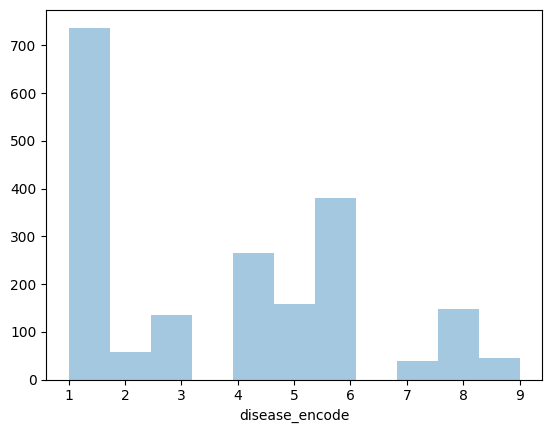

In [68]:
#查看标签数据分布
print('类别标签分布')
print(Disease.value_counts())
sns.distplot(Disease,hist=True,kde=False)

不包含正常样本

In [73]:
#分配训练和测试集
from sklearn.model_selection import train_test_split
DataClass_Nomal['Gender']=traindata.loc[:,'gender_encode']    #接入性别数据
Disease=Disease-1    #标签调整
Data_train_class,Data_test_class,Label_train_class,Label_test_class=train_test_split(DataClass_Nomal,Disease,train_size=0.8,random_state=123)
print('训练集数据规模为:{0},测试集数据规模为:{1}'.format(Data_train_class.shape,Data_test_class.shape))
print('训练集标签规模为:{0},测试集标签规模为:{1}'.format(Label_train_class.shape,Label_test_class.shape)) 

训练集数据规模为:(1573, 10001),测试集数据规模为:(394, 10001)
训练集标签规模为:(1573,),测试集标签规模为:(394,)


In [74]:
#查看数据标签分布
print('-------------训练数据集------------------')
print(Label_train_class.value_counts())
print('-------------测试数据集------------------')
print(Label_test_class.value_counts())

-------------训练数据集------------------
disease_encode
0    589
5    305
3    210
4    128
7    121
2    103
1     50
8     39
6     28
Name: count, dtype: int64
-------------测试数据集------------------
disease_encode
0    148
5     76
3     56
2     32
4     31
7     26
6     10
1      8
8      7
Name: count, dtype: int64


In [76]:
#加载并训练XGBoost模型
import xgboost
Model_XGB_Class=xgboost.XGBClassifier(booster='gbtree',n_estimators=1000,max_depth=2,objective='multi-softmax',gpu_id=0, tree_method='gpu_hist')
Model_XGB_Class.fit(Data_train_class,Label_train_class) 

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [77]:
#模型测量
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report
def Model_Evaluate(model,X_train,y_train,X_test,y_test):
    train_pred=model.predict(X_train)    #训练误差测定
    precision_train=precision_score(y_train,train_pred,average='micro')
    recall_train=recall_score(y_train,train_pred,average='micro')
    f1_train=f1_score(y_train,train_pred,average='micro')
    accuracy_train=accuracy_score(y_train,train_pred)
    print('模型训练准确率为:{0},召回率为:{1},f1分数为:{2},精度为:{3}'.format(precision_train,recall_train,f1_train,accuracy_train))
    test_pred=model.predict(X_test)    #测试误差测定
    precision_test=precision_score(y_test,test_pred,average='micro')
    recall_test=recall_score(y_test,test_pred,average='micro')
    f1_test=f1_score(y_test,test_pred,average='micro')
    accuracy_test=accuracy_score(y_test,test_pred)
    print('模型测试准确率为:{0},召回率为:{1},f1分数为:{2},精度为:{3}'.format(precision_test,recall_test,f1_test,accuracy_test))
    train_err=1-model.score(X_train,y_train)
    test_err=1-model.score(X_test,y_test)
    print('模型训练误差:{0},测试误差:{1}'.format(train_err,test_err))
    print(classification_report(y_test,test_pred))
Model_Evaluate(Model_XGB_Class, Data_train_class,Label_train_class, Data_test_class,Label_test_class)

模型训练准确率为:1.0,召回率为:1.0,f1分数为:1.0,精度为:1.0
模型测试准确率为:0.9619289340101523,召回率为:0.9619289340101523,f1分数为:0.9619289340101523,精度为:0.9619289340101523
模型训练误差:0.0,测试误差:0.03807106598984766
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       148
           1       1.00      1.00      1.00         8
           2       0.88      0.88      0.88        32
           3       1.00      1.00      1.00        56
           4       1.00      0.97      0.98        31
           5       0.99      0.93      0.96        76
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        26
           8       0.78      1.00      0.88         7

    accuracy                           0.96       394
   macro avg       0.95      0.97      0.96       394
weighted avg       0.96      0.96      0.96       394



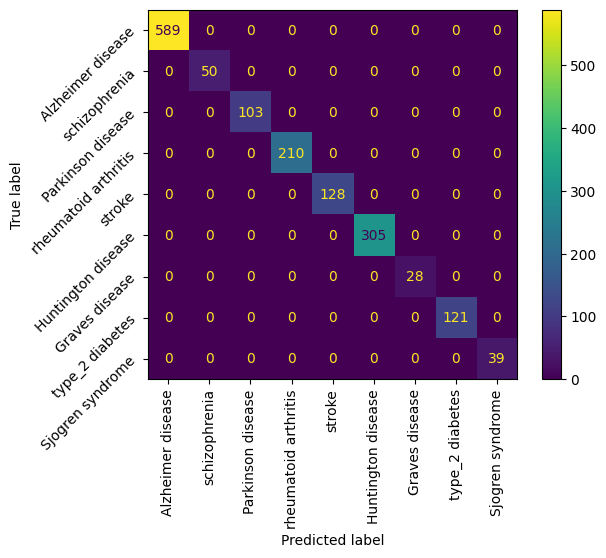

In [79]:
#可视化混淆矩阵
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
Label_class=['Alzheimer disease','schizophrenia','Parkinson disease','rheumatoid arthritis',
             'stroke','Huntington disease','Graves disease','type_2 diabetes','Sjogren syndrome']
def Viz_confusion_Matrix(model,X,y):
    y_pred=model.predict(X)
    con_matr=confusion_matrix(y, y_pred)
    con_matr=ConfusionMatrixDisplay(con_matr,display_labels=Label_class)
    con_matr.plot(include_values=True, cmap='viridis', xticks_rotation='horizontal', values_format='d', ax=None)
    con_matr.ax_.set_xticklabels(Label_class, rotation=90)  # 这里可以设置x轴标签的旋转角度 
    con_matr.ax_.set_yticklabels(Label_class, rotation=45)  # 这里可以设置y轴标签的旋转角度
Viz_confusion_Matrix(Model_XGB_Class, Data_train_class,Label_train_class)    #可视化Xgboost模型混淆矩阵(训练)

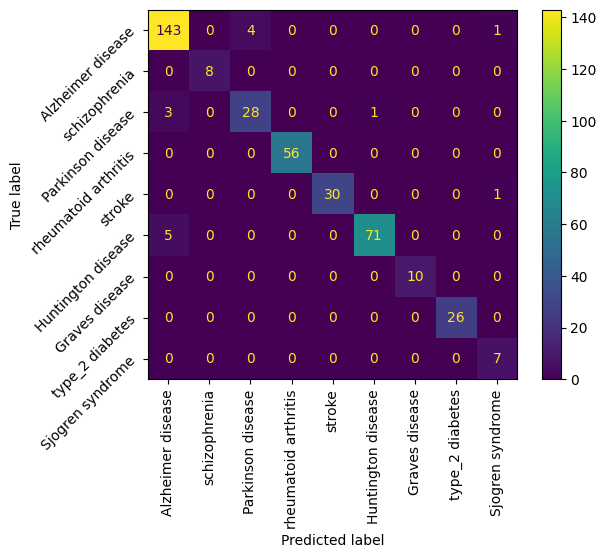

In [80]:
Viz_confusion_Matrix(Model_XGB_Class, Data_test_class,Label_test_class)    #可视化Xgboost模型混淆矩阵(测试)

<Axes: title={'center': 'Feature importance'}, xlabel='gain', ylabel='Features'>

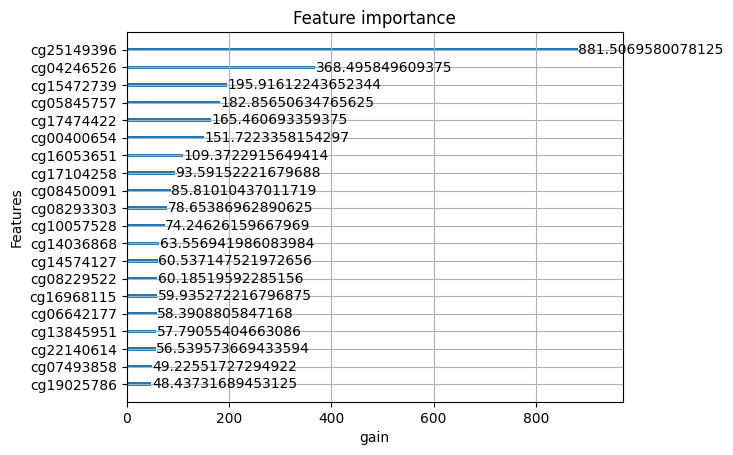

In [81]:
#提取贡献较大的前20个甲基化位点
from xgboost import plot_importance
plot_importance(Model_XGB_Class,max_num_features=20,importance_type='gain',xlabel='gain')    #可视化前20个甲基化位点数据

In [82]:
#保存模型
import joblib
joblib.dump(Model_XGB_Class,'/mnt/workspace/Disease_class/ClassModels_Nomal/Model_XGB_Class.pkl')

['/mnt/workspace/Disease_class/ClassModels_Nomal/Model_XGB_Class.pkl']

In [83]:
Model_XGB_Class.save_model('/mnt/workspace/Disease_class/ClassModels_Nomal/model_file_xgb_class.xgb')

In [ ]:
from lightgbm import LGBMClassifier
Model_LGB_Class=LGBMClassifier(subsample=0.5,colsample_bytree=0.5,n_jobs=-1)
Model_LGB_Class.fit(Data_train_class,Label_train_class)

In [85]:
Model_Evaluate(Model_LGB_Class, Data_train_class,Label_train_class, Data_test_class,Label_test_class)

模型训练准确率为:1.0,召回率为:1.0,f1分数为:1.0,精度为:1.0
模型测试准确率为:0.9543147208121827,召回率为:0.9543147208121827,f1分数为:0.9543147208121827,精度为:0.9543147208121827
模型训练误差:0.0,测试误差:0.045685279187817285
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       148
           1       1.00      1.00      1.00         8
           2       0.87      0.84      0.86        32
           3       0.98      1.00      0.99        56
           4       1.00      0.97      0.98        31
           5       0.95      0.92      0.93        76
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        26
           8       1.00      1.00      1.00         7

    accuracy                           0.95       394
   macro avg       0.97      0.97      0.97       394
weighted avg       0.95      0.95      0.95       394



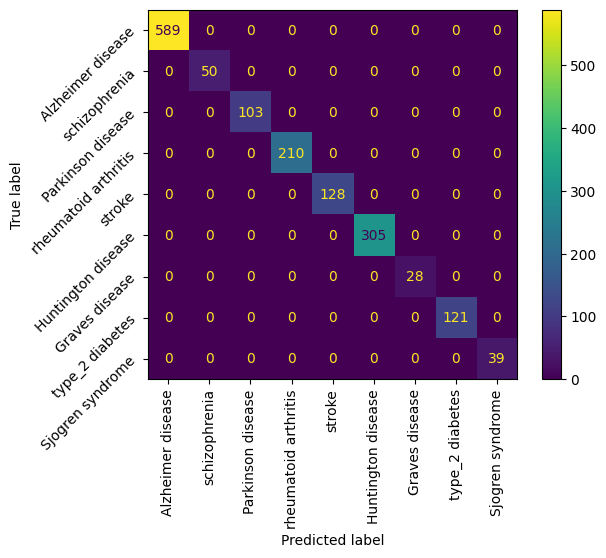

In [86]:
Viz_confusion_Matrix(Model_LGB_Class, Data_train_class,Label_train_class)    #可视化lightGM模型混淆矩阵(训练)

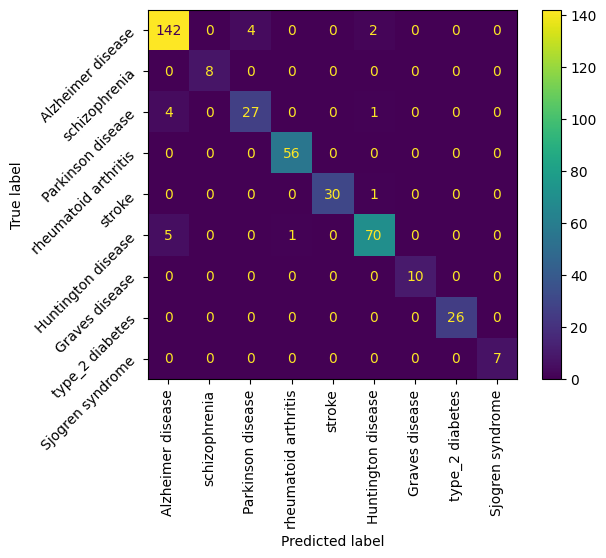

In [87]:
Viz_confusion_Matrix(Model_LGB_Class, Data_test_class,Label_test_class)    #可视化lightGM模型混淆矩阵(测试)

In [88]:
joblib.dump(Model_LGB_Class,'/mnt/workspace/Disease_class/ClassModels_Nomal/Model_LGB_Class.pkl')

['/mnt/workspace/Disease_class/ClassModels_Nomal/Model_LGB_Class.pkl']

<Axes: title={'center': 'Feature importance'}, xlabel='gain', ylabel='Features'>

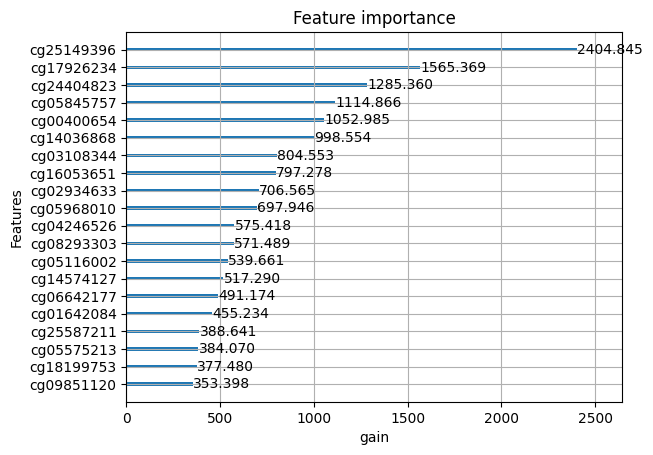

In [89]:
from lightgbm import plot_importance
plot_importance(Model_LGB_Class,max_num_features=20,importance_type='gain',xlabel='gain')    #可视化前20个甲基化位点

In [ ]:
#训练catBoost模型
from catboost import CatBoostClassifier
Model_Cat=CatBoostClassifier(learning_rate=0.5, depth=3, bootstrap_type='Bernoulli',
                            random_seed=2023,od_type='Iter', od_wait=100)
Model_Cat.fit(Data_train_class,Label_train_class)

In [91]:
Model_Evaluate(Model_Cat, Data_train_class,Label_train_class, Data_test_class,Label_test_class)

模型训练准确率为:1.0,召回率为:1.0,f1分数为:1.0,精度为:1.0
模型测试准确率为:0.934010152284264,召回率为:0.934010152284264,f1分数为:0.934010152284264,精度为:0.934010152284264
模型训练误差:0.0,测试误差:0.06598984771573602
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       148
           1       1.00      1.00      1.00         8
           2       0.83      0.91      0.87        32
           3       0.95      0.98      0.96        56
           4       1.00      0.94      0.97        31
           5       0.94      0.86      0.90        76
           6       1.00      1.00      1.00        10
           7       0.93      1.00      0.96        26
           8       0.88      1.00      0.93         7

    accuracy                           0.93       394
   macro avg       0.94      0.96      0.95       394
weighted avg       0.94      0.93      0.93       394



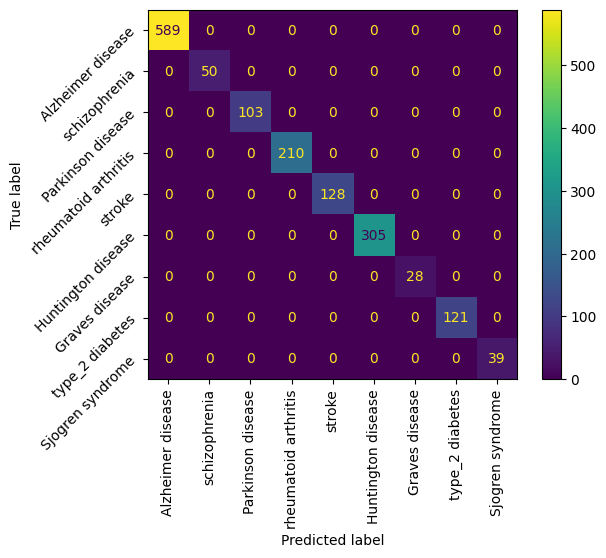

In [92]:
Viz_confusion_Matrix(Model_Cat, Data_train_class,Label_train_class)    #可视化CatBoost模型混淆矩阵(训练)

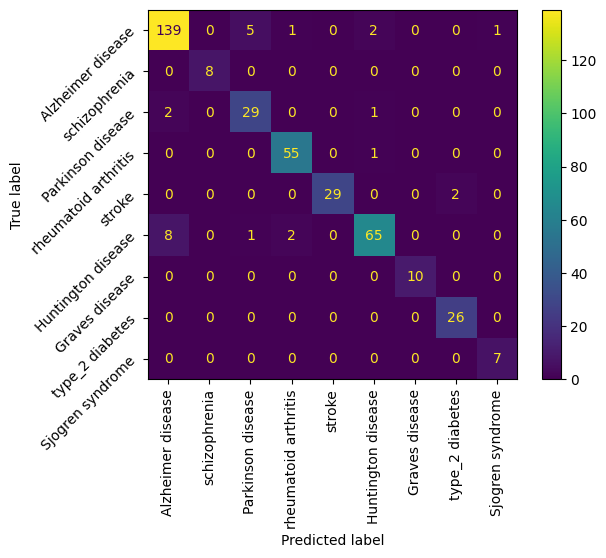

In [93]:
Viz_confusion_Matrix(Model_Cat, Data_test_class,Label_test_class)    #可视化CatBoost模型混淆矩阵(测试)

In [94]:
joblib.dump(Model_Cat,'/mnt/workspace/Disease_class/ClassModels_Nomal/Model_Cat_Class.pkl')

['/mnt/workspace/Disease_class/ClassModels_Nomal/Model_Cat_Class.pkl']

In [95]:
#绘制CatBoost模型特征重要性评分
Feature_importance_Cat=DataFrame()
Feature_importance_Cat['fearure names']=Data_train_class.columns    #特征列表
Feature_importance_Cat['fearure importance']=Model_Cat.get_feature_importance()    #特征重要性评分
Feature_importance_Cat=Feature_importance_Cat.sort_values('fearure importance',ascending=False)    #按照降序排序

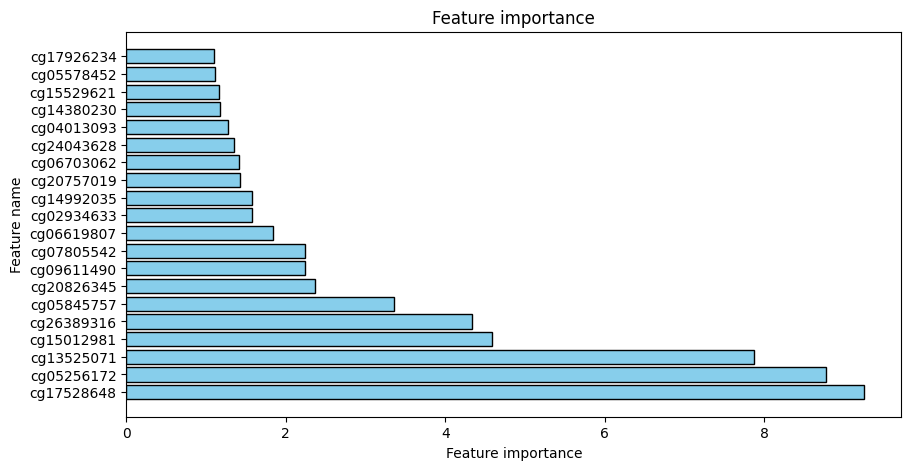

In [96]:
# 绘制CatBoost模型特征重要性柱形图
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('Feature importance')
plt.barh(np.arange(1,21), Feature_importance_Cat.iloc[:20,1],color='skyblue', edgecolor='black')
plt.ylabel('Feature name')  
plt.xlabel('Feature importance')
plt.yticks(np.arange(1,21),Feature_importance_Cat.iloc[:20,0])
plt.show()

In [97]:
from pandas import DataFrame
Feature_importance=DataFrame()
Feature_importance['fearure names']=Data_train_class.columns    #特征列表
Feature_importance['fearure importance']=Model_XGB_Class.feature_importances_    #特征重要性评分
Feature_importance=Feature_importance.sort_values('fearure importance',ascending=False)    #按照降序排序

In [100]:
Feature_list=list(Feature_importance.iloc[:20,0])
Feature_Data=DataClass_Nomal.loc[:,Feature_list]
Feature_traindata,Feature_testdata,Feature_trainlabel,Feature_testlabel=train_test_split(Feature_Data,Disease,train_size=0.8,random_state=123)
print('训练集数据规模为:{0},测试集数据规模为:{1}'.format(Feature_traindata.shape,Feature_testdata.shape))
print('训练集标签规模为:{0},测试集标签规模为:{1}'.format(Feature_trainlabel.shape,Feature_testlabel.shape)) 

训练集数据规模为:(1573, 20),测试集数据规模为:(394, 20)
训练集标签规模为:(1573,),测试集标签规模为:(394,)


In [101]:
#训练XGBoost模型
Feature_XGB=xgboost.XGBClassifier(booster='gbtree',n_estimators=800,max_depth=2,objective='multi-softmax',gpu_id=0, tree_method='gpu_hist')
Feature_XGB.fit(Feature_traindata,Feature_trainlabel)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [102]:
Model_Evaluate(Feature_XGB,Feature_traindata,Feature_trainlabel,Feature_testdata,Feature_testlabel)

模型训练准确率为:1.0,召回率为:1.0,f1分数为:1.0,精度为:1.0
模型测试准确率为:0.9137055837563451,召回率为:0.9137055837563451,f1分数为:0.9137055837563451,精度为:0.9137055837563451
模型训练误差:0.0,测试误差:0.08629441624365486
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       148
           1       0.50      0.88      0.64         8
           2       0.88      0.88      0.88        32
           3       0.95      0.96      0.96        56
           4       1.00      0.90      0.95        31
           5       0.94      0.87      0.90        76
           6       0.88      0.70      0.78        10
           7       0.92      0.92      0.92        26
           8       1.00      0.71      0.83         7

    accuracy                           0.91       394
   macro avg       0.89      0.86      0.87       394
weighted avg       0.92      0.91      0.92       394



In [103]:
import shap
Explainer=shap.TreeExplainer(Feature_XGB)    #创建解释器
shap_values=Explainer.shap_values(Feature_traindata)    #计算训练shap值

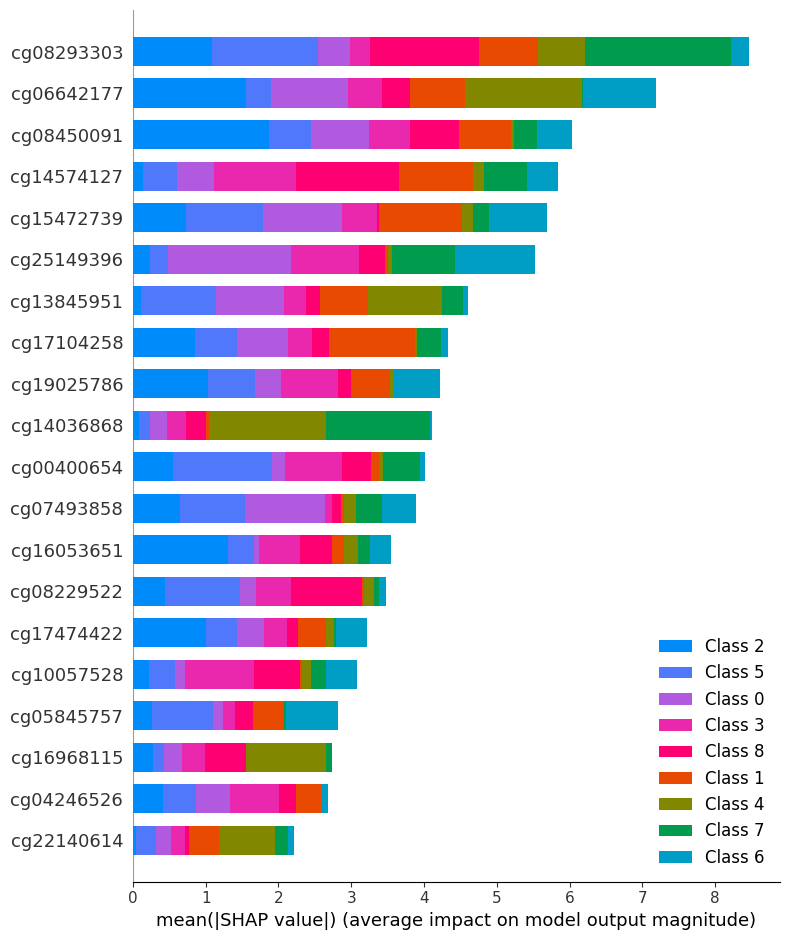

In [104]:
shap.summary_plot(shap_values,Feature_traindata)    #全局特征SHAP分布(训练)

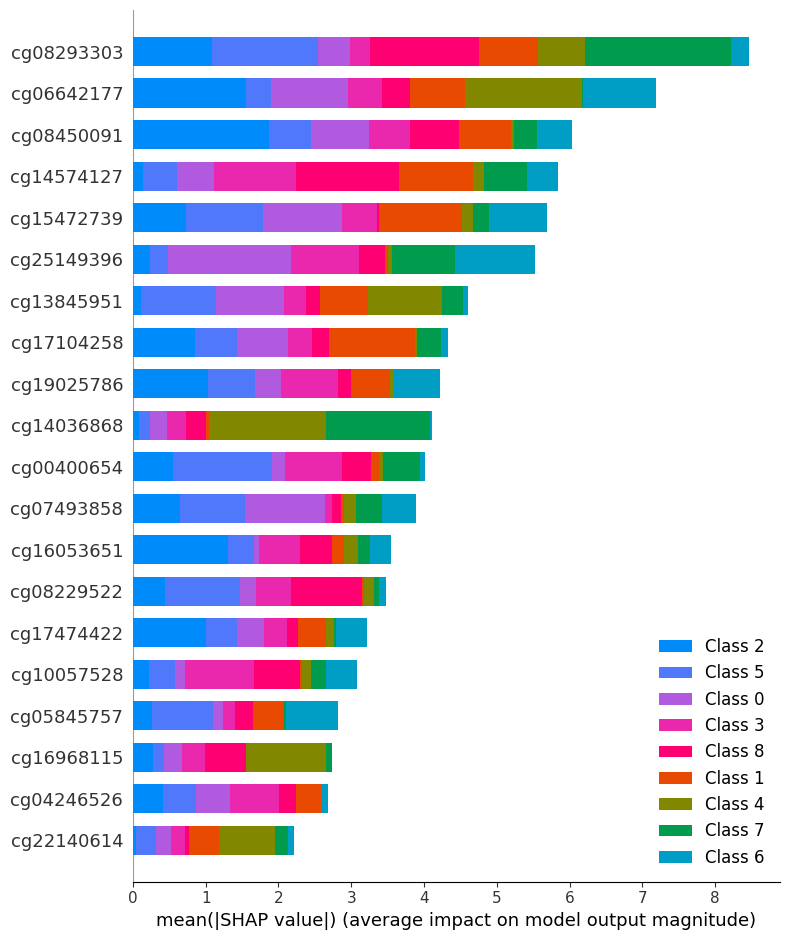

In [105]:
shap.summary_plot(shap_values,Feature_traindata,plot_type='bar')    #特征重要性堆叠图(训练)

In [106]:
Explainer_test=shap.TreeExplainer(Feature_XGB)    #创建解释器
shap_values_test=Explainer_test.shap_values(Feature_testdata)    #计算测试shap值

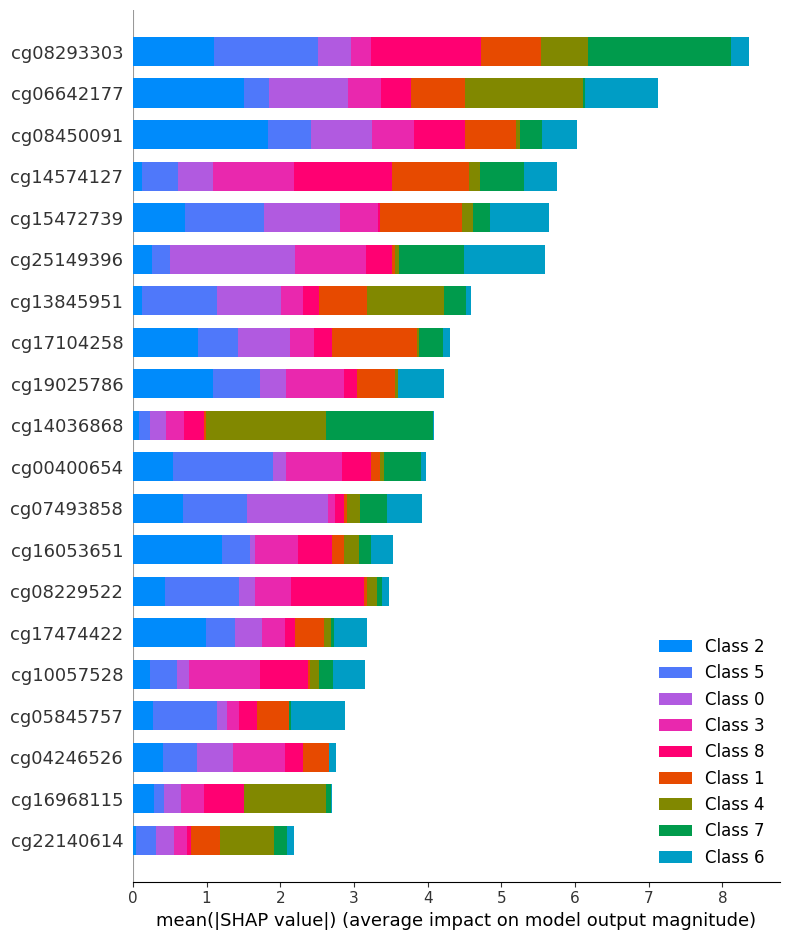

In [107]:
shap.summary_plot(shap_values_test,Feature_testdata)    #全局特征SHAP分布(测试)

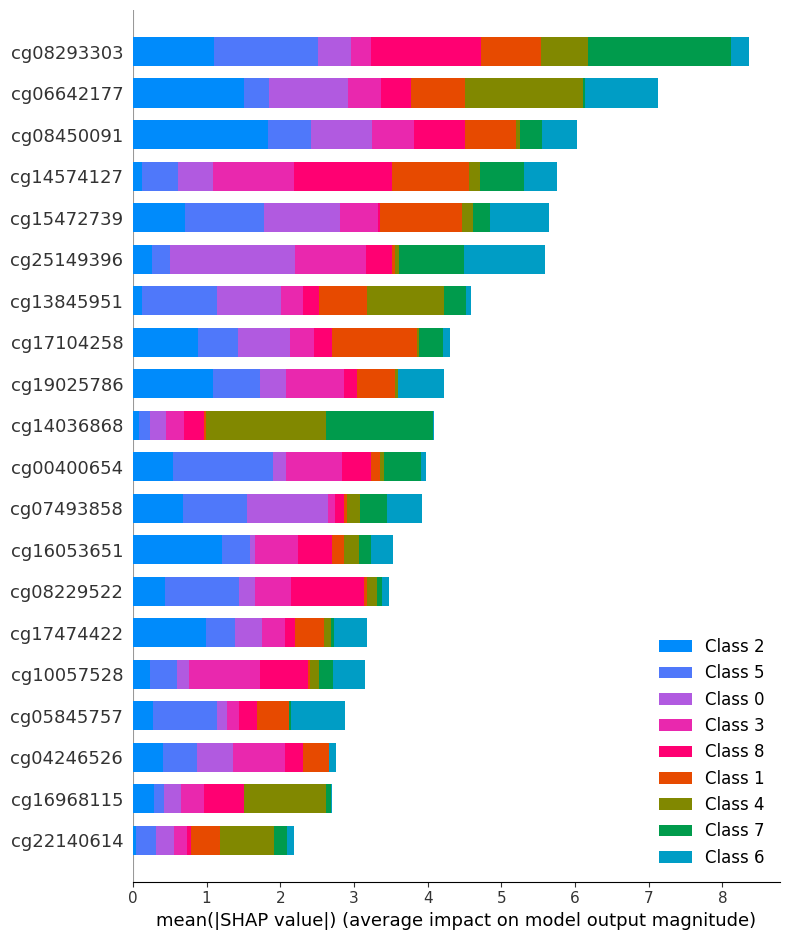

In [108]:
shap.summary_plot(shap_values_test,Feature_testdata,plot_type='bar')    #特征重要性堆叠图(测试)

In [109]:
#构建数据子集
Featute_Data=Feature_list+['gender','sample_type','disease','disease_encode','sample_type_encode','gender_encode']
ClassData=traindata.loc[:,Featute_Data]
ClassData.head(10)

cg25149396  cg04246526  cg15472739  cg05845757  cg17474422  cg00400654   
0   -2.152700    1.324576   -3.374769    1.103684    0.939290    2.079779  \
1   -2.030118    1.449607   -2.921730    1.379684    1.253727    1.635580   
2   -1.831393    1.773795   -3.284902    1.578093    1.456115    2.039899   
3   -2.030118    1.253727   -2.861514    1.757764    1.529517    2.324893   
4   -2.110522    1.436670   -2.823096    1.367282    1.342748    2.049755   
5   -2.089945    1.945225   -3.580953    1.141464    1.259524    1.856830   
6   -2.030118    1.436670   -3.543689    2.030118    1.814692    1.927076   
7   -1.972920    1.430239   -3.100385    1.918093    1.564056    2.324893   
8   -2.253116    1.865415   -3.543689    1.253727    1.236447    2.276579   
9   -2.324893    1.392179   -3.314031    1.436670    1.469211    2.079779   

   cg16053651  cg17104258  cg08450091  cg08293303  ...  cg13845951   
0    2.174329   -4.585271    1.336669    0.326813  ...    2.454856  \
1    2.174329   -4.178048    1.040530    0.566575  ...    1.798190   
2    1.945225   -3.701353    0.934347    0.269567  ...    1.765757   
3    2.069693   -3.938986    1.585160    0.409549  ...    2.276579   
4    2.540233   -3.993781    0.758205    0.277716  ...    2.110522   
5    1.726235   -4.112908    0.837604    0.434629  ...    2.324893   
6    2.337277   -3.837361    0.562248    0.253295  ...    2.142023   
7    2.264792   -3.938986    0.694497    0.532105  ...    2.264792   
8    2.276579   -3.993781    0.866223    0.485205  ...    2.540233   
9    2.039899   -5.492861    0.434629    0.249233  ...    2.059685   

   cg22140614  cg07493858  cg19025786  gender     sample_type   
0    2.823096    1.469211   -0.672075       F  disease tissue  \
1    3.619579    1.168907   -0.866223       F  disease tissue   
2    9.210440    1.536363   -0.443019       F  disease tissue   
3    3.374769    1.456115   -0.426255       F  disease tissue   
4    2.861514    1.019899   -0.818704       M  disease tissue   
5    3.343970    1.790011   -0.527819       M  disease tissue   
6    4.051632    1.757764   -0.939290       F  disease tissue   
7    3.439160    1.515914   -0.493692       M  disease tissue   
8    3.938986    1.606561   -0.694497       F  disease tissue   
9    3.938986    1.909169   -0.712557       M  disease tissue   

               disease  disease_encode  sample_type_encode  gender_encode  
0  Alzheimer's disease               1                   1            0.0  
1  Alzheimer's disease               1                   1            0.0  
2  Alzheimer's disease               1                   1            0.0  
3  Alzheimer's disease               1                   1            0.0  
4  Alzheimer's disease               1                   1            1.0  
5  Alzheimer's disease               1                   1            1.0  
6  Alzheimer's disease               1                   1            0.0  
7  Alzheimer's disease               1                   1            1.0  
8  Alzheimer's disease               1                   1            0.0  
9  Alzheimer's disease               1                   1            1.0  

[10 rows x 26 columns]

In [110]:
ClassData.to_excel('/mnt/workspace/Disease_class/Feature_Data_ClassDisease/ClassDisease_FeatureData_Nomal.xlsx','UTF-8')

比较不同解决方案甲基化数据差异

In [111]:
#读入包含正常数据的特征选择数据
DataClass=pd.read_excel('/mnt/workspace/Disease_class/Feature_Data_ClassDisease/ClassDisease_FeatureData.xlsx')
Feature_list_Mal=DataClass.columns

In [113]:
Feature_list_Mal=DataClass.columns[1:-6]
Feature_list_Mal

Index(['cg10501210', 'cg25149396', 'cg10818901', 'cg00687252', 'cg05839741',
       'cg00339300', 'cg18813010', 'cg13299325', 'cg21573263', 'cg00400654',
       'cg04571355', 'cg10057528', 'cg17983632', 'cg10378348', 'cg16037711',
       'cg13845951', 'cg08146977', 'cg08229522', 'cg13675050', 'cg12467852'],
      dtype='object')

In [127]:
#比较不同方法甲基化位点数据
Feature_Nomal=set(Feature_list)
Feature_mal=set(list(Feature_list_Mal))
diff=Feature_Nomal.symmetric_difference(Feature_mal)     #获取不同元素
same=Feature_Nomal.intersection(Feature_mal)    #获取相同元素
print('相同甲基化位点:',same)
print('不同甲基化位点:',diff)

相同甲基化位点: {'cg10057528', 'cg25149396', 'cg00400654', 'cg08229522', 'cg13845951'}
不同甲基化位点: {'cg12467852', 'cg21573263', 'cg19025786', 'cg05845757', 'cg08293303', 'cg05839741', 'cg08450091', 'cg10378348', 'cg16053651', 'cg14036868', 'cg04246526', 'cg13299325', 'cg17983632', 'cg07493858', 'cg04571355', 'cg06642177', 'cg00339300', 'cg13675050', 'cg16968115', 'cg10818901', 'cg22140614', 'cg15472739', 'cg17474422', 'cg08146977', 'cg00687252', 'cg18813010', 'cg10501210', 'cg14574127', 'cg17104258', 'cg16037711'}
